In [1]:
from math import sqrt
import random    

# Load your image

In [2]:
import requests
from PIL import Image
from io import BytesIO

# URLs of the images
url = "https://images.datacamp.com/image/upload/v1689699524/Comparing_different_industry_terms_9e8fa1a2ff.png"
response = requests.get(url)

# Download the images & Check if the requests were successful
if response.status_code == 200:
    # Open the images
    image1 = Image.open(BytesIO(response.content))

else:
    print("Failed to retrieve one or both images.")

# K Means

In [3]:
class Point:
    
    def __init__(self, coordinates):
        self.coordinates = coordinates

In [4]:
class Cluster:
  
    def __init__(self, center, points):
        self.center = center
        self.points = points

In [5]:
class KMeans:
  
    def __init__(self, n_clusters, min_diff = 1):
        self.n_clusters = n_clusters
        self.min_diff = min_diff
    
    def calculate_center(self, points):    
        n_dim = len(points[0].coordinates)    
        vals = [0.0 for i in range(n_dim)]    
        for p in points:
            for i in range(n_dim):
                vals[i] += p.coordinates[i]
        coords = [(v / len(points)) for v in vals]    
        return Point(coords)
  
    def assign_points(self, clusters, points):
        plists = [[] for i in range(self.n_clusters)]

        for p in points:
            smallest_distance = float('inf')

            for i in range(self.n_clusters):
                distance = euclidean(p, clusters[i].center)
                if distance < smallest_distance:
                    smallest_distance = distance
                    idx = i
                plists[idx].append(p)
    
        return plists
    
    def fit(self, points):
        clusters = [Cluster(center=p, points=[p]) for p in random.sample(points, self.n_clusters)]
    
        while True:

            plists = self.assign_points(clusters, points)

            diff = 0

            for i in range(self.n_clusters):
                if not plists[i]:
                    continue
                old = clusters[i]
                center = self.calculate_center(plists[i])
                new = Cluster(center, plists[i])
                clusters[i] = new
                diff = max(diff, euclidean(old.center, new.center))

            if diff < self.min_diff:
                break

        return clusters

# Find the most common colors

In [6]:
def euclidean(p, q):
    n_dim = len(p.coordinates)
    return sqrt(sum([
      (p.coordinates[i] - q.coordinates[i]) ** 2 for i in range(n_dim)
    ]))

def get_points(image_path):  
    img = Image.open(image_path)
    img.thumbnail((200, 400))
    img = img.convert("RGB")
    w, h = img.size

    points = []
    for count, color in img.getcolors(w * h):
        for _ in range(count):
            points.append(Point(color))

    return points

def rgb_to_hex(rgb):
    return '#%s' % ''.join(('%02x' % p for p in rgb))

def get_colors(filename, n_colors=3):
    points = get_points(filename)
    clusters = KMeans(n_clusters=n_colors).fit(points)
    clusters.sort(key=lambda c: len(c.points), reverse = True)
    rgbs = [map(int, c.center.coordinates) for c in clusters]
    return list(map(rgb_to_hex, rgbs))

Print colors

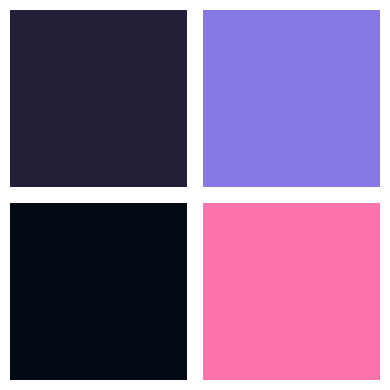

In [7]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches

colors = ['#222038', '#8578e3', '#020b15', '#fd73ac']

# Create a figure and a set of subplots
fig, ax = plt.subplots(2, 2, figsize=(4, 4))

# Iterate over the colors and corresponding subplot locations
for i, color in enumerate(colors):
    row = i // 2
    col = i % 2
    ax[row, col].add_patch(patches.Rectangle((0, 0), 1, 1, color=color))
    ax[row, col].set_xlim(0, 1)
    ax[row, col].set_ylim(0, 1)
    ax[row, col].axis('off')

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

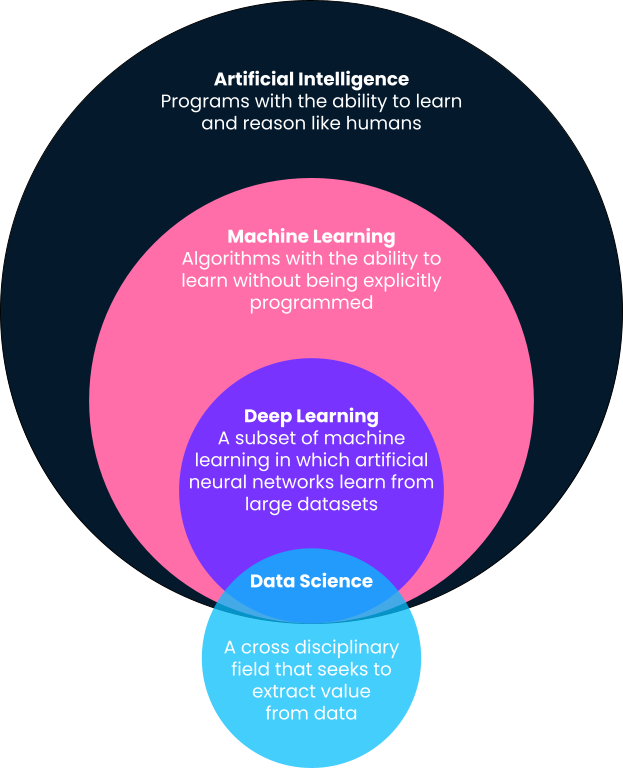

In [8]:
# Print image
image1